#Tarea 1: Resolución



**Tarea obligatoria para entregar individualmente pero se recomienda trabajar y realizarla en grupos (de a 2 o 3 compañera/os), entreguen todos los integrantes consignando cuales fueron los compañerxs.**

Sea la señal $$f(t)=7+cos(22\pi t)+sen(16pi t^{2})$$ con $t \in R $ medido en segundos. 

1. Digitalice la señal  f  con un período de muestreo de 0.001 s, en el intervalo $t \in [0,0.8)$
2. Calcule la frecuencia de muestreo y la cantidad de muestras.
3. Grafique la señal muesteada en función del tiempo.
4. Calcule la transformada de Fourier de la señal muestreada punto N=700. Y grafique utilizando subplot, la parte real y la parte imaginaria por separado. 
5. Se puede reconstruir la señal muestreada en el item 1 utilizando el resultado del item 4? se ha realizado un Zero padding o un truncamiento?



Instalamos la librerías y sublibrerías necesarias para la notebook

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.fftpack import fft,fftshift,ifft #funciones para trabajar con la Transformada de Fourier

1) Se digitaliza la señal  f  con un período de muestreo de 0.001 s, en el intervalo $t \in [0,0.8)$

In [2]:
Tm=0.001 #período de muestreo, es decir, distancia en tiempo entre muestra y muestra
t=np.arange(0,0.8,Tm) #armado del vector digitalizado de tiempos entre 0 y 0.08 segundos

f=7+3*np.cos(22*np.pi*t)+np.sin(16*np.pi*(t**2)) #digitalización de la señal


2) Se calcula la frecuencia de muestreo y la cantidad de muestras.

In [3]:
Fm=1/Tm #cálculo de la frecuencia de muestreo
Cm=len(t) #cálculo de la cantidad de muestras en el período t

#Impresión de estos resultados
print('Frecuencia de muestreo = ', Fm)
print('Cantidad de muestras en t = ', len(t))

Frecuencia de muestreo =  1000.0
Cantidad de muestras en t =  800


3) Se grafica la señal muesteada en función del tiempo.

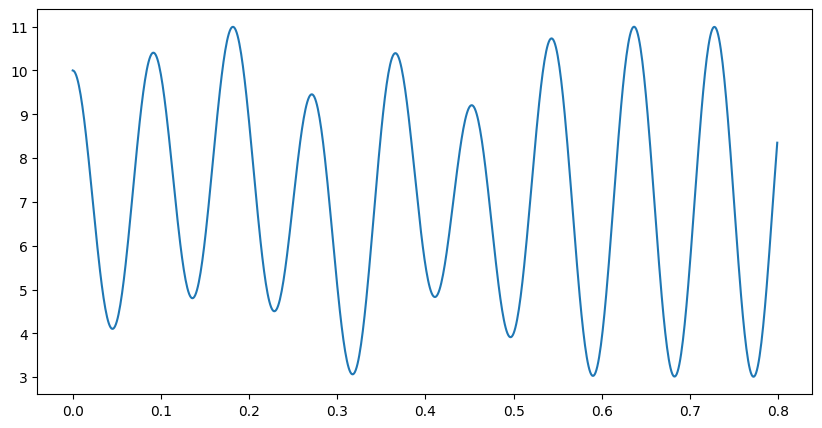

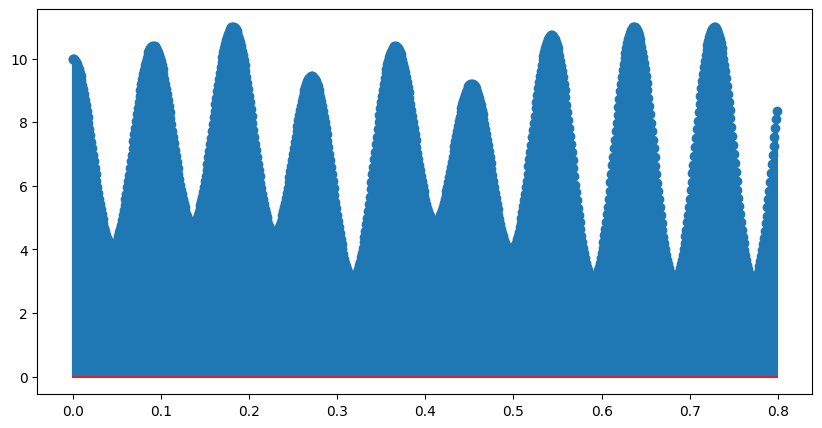

In [4]:
plt.figure(figsize=(10,5)) #se define el tamaño del nuevo gráfico
plt.plot(t,f) #gráfico como una señal continua (aunque se sabe que es una señal digitalizada)
plt.show() #se muestra el gráfico, este comando se utiliza cuando hay más de un gráfico a mostrar en un mismo bloque de código

plt.figure(figsize=(10,5)) #se define el tamaño del nuevo gráfico
plt.stem(t,f) #gráfico de señal discreta
plt.show()  #se muestra el gráfico, este comando se utiliza cuando hay más de un gráfico a mostrar en un mismo bloque de código

4) Se calcula la transformada de Fourier de la señal muestreada punto N=700. Y se grafica utilizando subplot, la parte real y la parte imaginaria por separado. 

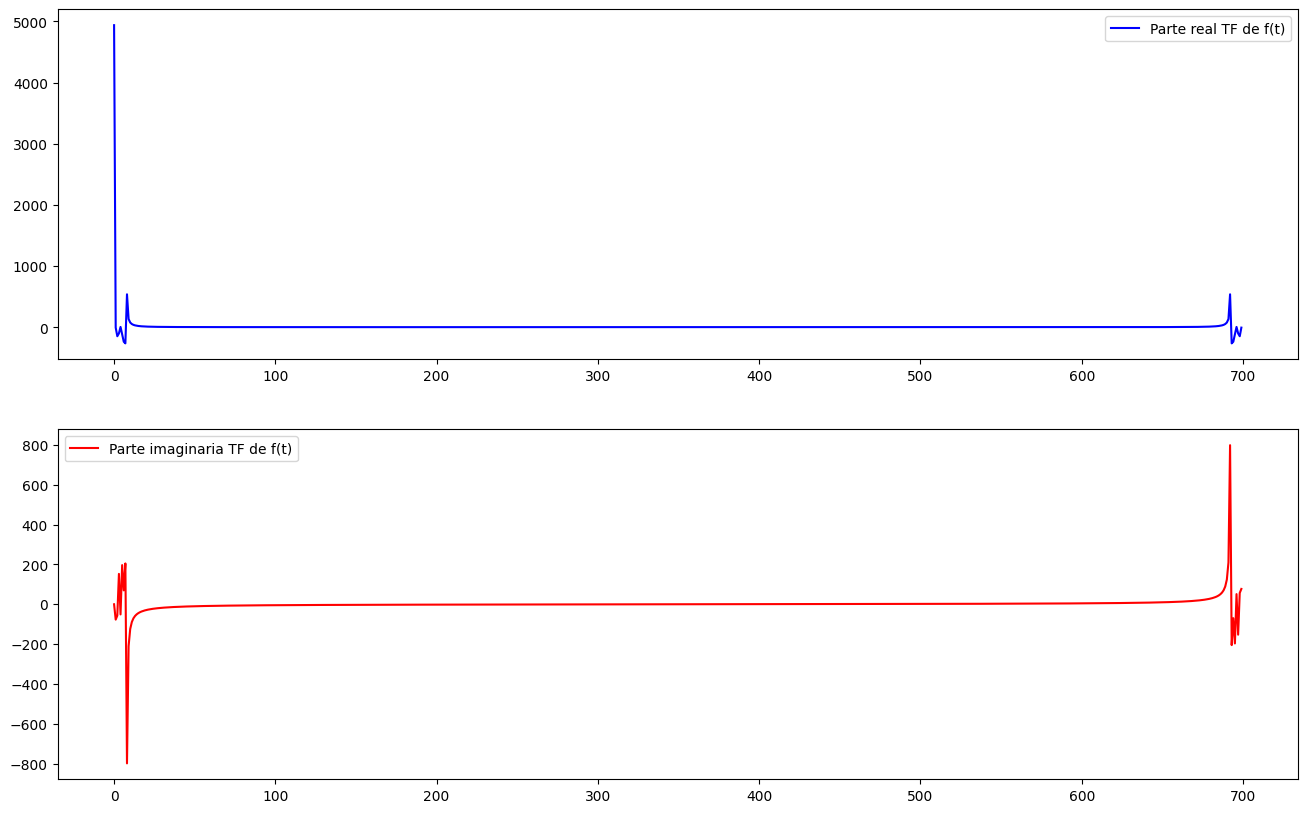

In [5]:
N=700 #punto N, es decir, cantidad de muestras utilizadas para calcular la Transformada de Fourier
Ftf=fft(f,N) #cálculo de la DFT punto N

plt.figure(figsize=(16,10)) #se define el tamaño del nuevo gráfico
plt.subplot(211) #se define la posición en la que irá la primer figura
plt.plot(np.real(Ftf), color='blue', label='Parte real TF de f(t)') #gráfico de la parte real de la DFT punto N: np.real(Ftf) separa la parte real de Ftf, color='blue' le da el color azul al trazo de la señal y label='Parte real TF de f(t)' coloca una leyenda en el gráfico con esta información.
plt.legend(loc='upper right') #se ubica la leyenda en la esquina superior derecha

plt.subplot(212)
plt.plot(np.imag(Ftf), color='red', label='Parte imaginaria TF de f(t)') #gráfico de la parte imaginaria de la DFT punto N
plt.legend(loc='upper left')

plt.show()

5) Se responden las preguntas ¿se puede reconstruir la señal muestreada en el item 1 utilizando el resultado del item 4? ¿se ha realizado un Zero padding o un truncamiento?

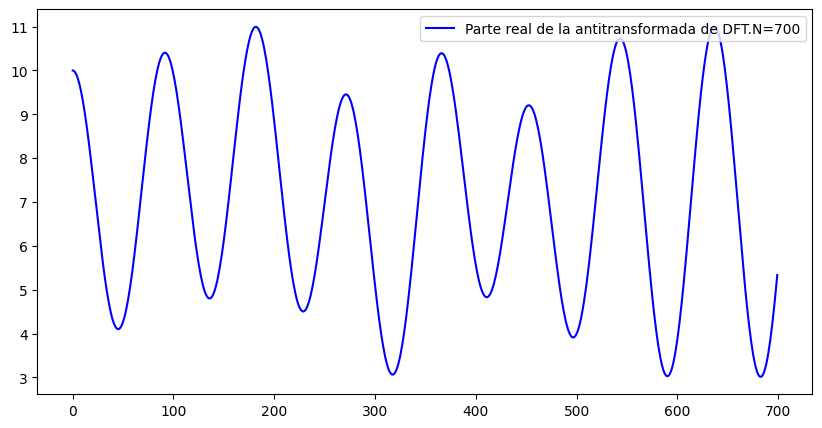

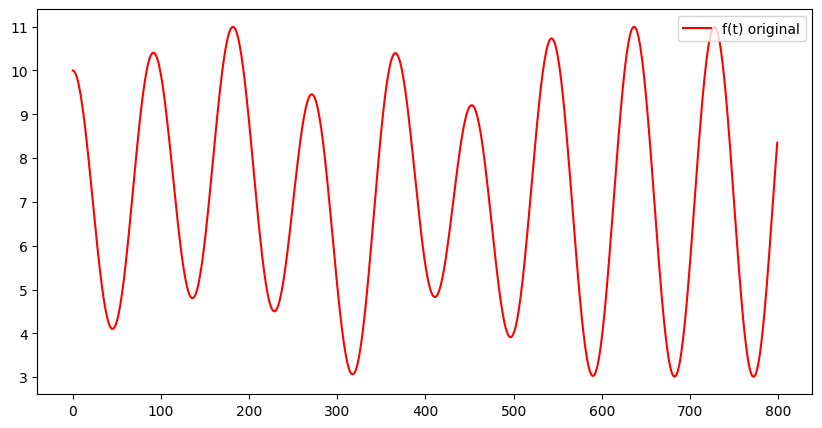

La señal original y la antitransformada de la DFT.N difieren en 100 muestras


In [6]:
IFtf=ifft(Ftf) #se hace la antitransformada de la DFT punto N, con N=700
plt.figure(figsize=(10,5)) 
plt.plot(np.real(IFtf), color='blue', label='Parte real de la antitransformada de DFT.N=700') #se grafica solo la parte real
plt.legend(loc='upper right') 
plt.show()

plt.figure(figsize=(10,5)) #se define el tamaño del nuevo gráfico
plt.plot(f, color='red', label='f(t) original') #se grafica la señal original
plt.legend(loc='upper right') 
plt.show()

DifM=len(f)-len(np.real(IFtf))
print('La señal original y la antitransformada de la DFT.N difieren en '+str(DifM)+' muestras') #se calcula e imprime la diferencia en muestras para establecer si las señales tienen la misma cantidad, se realizó truncamiento o zero padding

In [7]:
#Se concluye que las señales no tienen la misma cantidad de muestras, la reconstruída tiene menos 
#por lo que NO se puede reconstruir la señal muestreada en el item 1 utilizando el resultado del item 4.
#Además se ha realizado un TRUNCAMIENTO.